(x0)' = 1.247 x0 + -1.238 x0^2


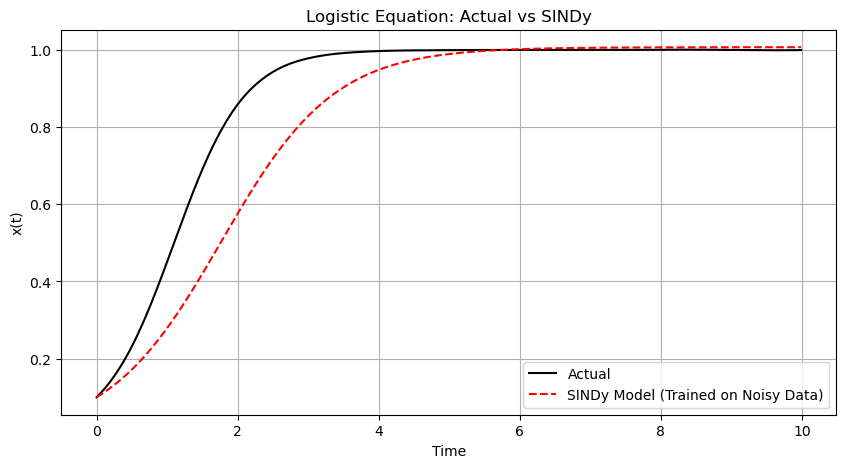

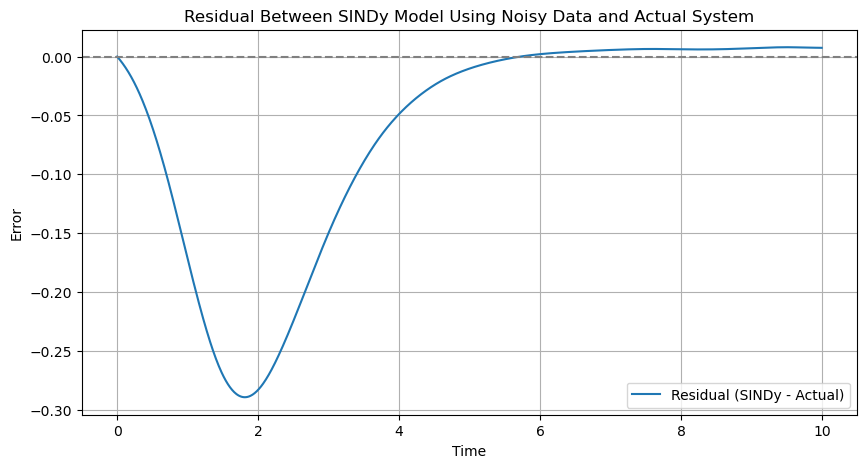

Mean Squared Error: 1.35244e-02


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error
import pysindy as ps

# Logistic equation: dx/dt = k * x * (1 - x / L)

# Logistic equation
def logistic(t, x, k = 2.0):
    return k * x * (1 - x) # Carrying Capacity of L = 1

# Simulate the actual system
k = 2.0
t_span = (0, 10)
dt = 0.01
t_eval = np.arange(t_span[0], t_span[-1], dt)
initial_condition = [0.1]
actual_solution = solve_ivp(logistic, t_span, initial_condition, t_eval = t_eval, args = (k,))
x_actual = actual_solution.y.T
t = actual_solution.t

# Add noise
noise_strength = 0.05
x_noisy = x_actual + noise_strength * np.random.randn(*x_actual.shape)

# Fit SINDy model
model = ps.SINDy()
model.fit(x_noisy, t = t)
model.print()

# Simulate SINDy model
x_sindy = model.simulate(initial_condition, t)

# Plot: Actual vs SINDy model using noisy data
plt.figure(figsize=(10, 5))
plt.plot(t, x_actual, 'k', label = 'Actual')
plt.plot(t, x_sindy, 'r--', label = 'SINDy Model (Trained on Noisy Data)')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()
plt.title('Logistic Equation: Actual vs SINDy')
plt.grid(True)
plt.show()

# Plot the residual (error)
residual = x_sindy - x_actual
plt.figure(figsize = (10, 5))
plt.plot(t, residual, label='Residual (SINDy - Actual)')
plt.axhline(0, color='gray', linestyle = '--')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.title('Residual Between SINDy Model Using Noisy Data and Actual System')
plt.grid(True)
plt.show()

# Quantify the error using MSE
mse = mean_squared_error(x_actual, x_sindy)
print(f"Mean Squared Error: {mse:.5e}")
